In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from Utils.read import read_data

sns.set_theme()

# Reading data

In [2]:
df = read_data(ignore_irregular = True)
df = df.assign(Year = df['Fecha'].apply(lambda x: x.year).values)
df.head(20)

,Fecha,Medida,Year
0,2022-01-01 00:00:00,4.028715e+09,2022
1,2022-01-01 00:10:00,4.028726e+09,2022
2,2022-01-01 00:20:00,4.028738e+09,2022
3,2022-01-01 00:30:00,4.028749e+09,2022
4,2022-01-01 00:40:00,4.028760e+09,2022
5,2022-01-01 00:50:00,4.028771e+09,2022
6,2022-01-01 01:00:00,4.028782e+09,2022
7,2022-01-01 01:10:00,4.028793e+09,2022
8,2022-01-01 01:20:00,4.028805e+09,2022
9,2022-01-01 01:30:00,4.028816e+09,2022


## Checking the time periods

In [3]:
def get_minutes(date):
    date_str = str(date)

    return int(date_str.split(' ')[-1].split(':')[-2])

def get_seconds(date):
    date_str = str(date)
    
    return int(date_str.split(' ')[-1].split(':')[-1])

### Minutes

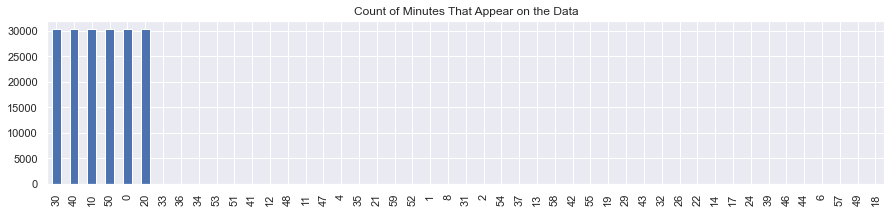

In [4]:
df['minutes'] = df['Fecha'].apply(get_minutes)
plt.figure(figsize = (15, 3))
plt.title('Count of Minutes That Appear on the Data')
df['minutes'].value_counts().plot(kind = 'bar');

In [5]:
pd.DataFrame(df['minutes'].value_counts()).T

,30,40,10,50,0,20,33,36,34,53,...,14,17,24,39,46,44,6,57,49,18
minutes,30387,30384,30383,30381,30381,30377,28,20,15,14,...,2,2,1,1,1,1,1,1,1,1


In [6]:
years = df[
    df['minutes'] % 10 != 0
]['Year'].unique()

print('Years in which irregular minutes appear {}'.format(years))

Years in which irregular minutes appear [2022 2021 2020 2019]


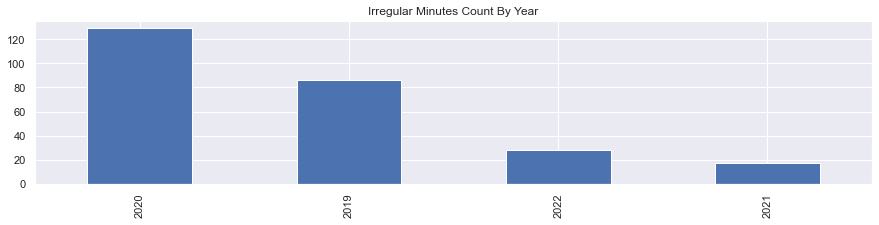

In [7]:
plt.figure(figsize = (15, 3))
plt.title('Irregular Minutes Count By Year')
df[
    df['minutes'] % 10 != 0
]['Year'].value_counts().plot(kind = 'bar');

### Seconds

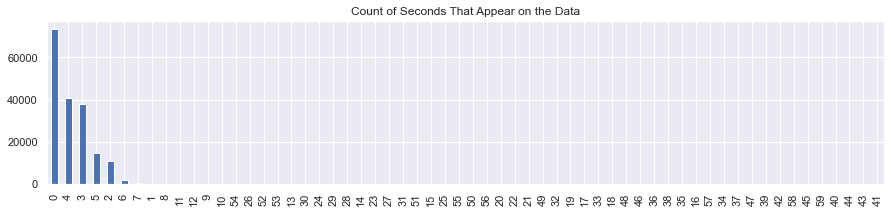

In [8]:
df['seconds'] = df['Fecha'].apply(get_seconds)
plt.figure(figsize = (15, 3))
plt.title('Count of Seconds That Appear on the Data')
df['seconds'].value_counts().plot(kind = 'bar');

In [9]:
pd.DataFrame(df['seconds'].value_counts()).T

,0,4,3,5,2,6,7,1,8,11,...,47,39,42,58,45,59,40,44,43,41
seconds,73608,41006,37902,14832,10817,1888,357,241,167,109,...,13,13,13,11,11,10,10,9,8,3


In [10]:
years = df[
    df['seconds'] != 0
]['Year'].unique()

print('Years in which irregular seconds appear {}'.format(years))

Years in which irregular seconds appear [2022 2021 2020 2019]


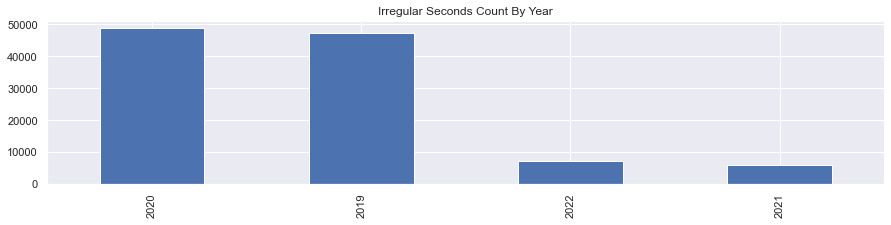

In [11]:
plt.figure(figsize = (15, 3))
plt.title('Irregular Seconds Count By Year')
df[
    df['seconds'] != 0
]['Year'].value_counts().plot(kind = 'bar');

# Fixing time periods
Seconds and minutes do vary between measurements, so we're going to set the seconds to 0 and round the minutes to the closest multiples of 10 without repeating dates

In [12]:
df[
    df['minutes'] % 10 != 0
]['Fecha']

47        2022-01-01 07:53:00
2615      2022-01-19 03:49:00
14313     2022-04-10 10:01:00
16008     2022-04-22 04:36:00
16009     2022-04-22 04:36:00
                 ...         
173151    2019-10-27 17:52:14
173152    2019-10-27 17:52:15
173153    2019-10-27 17:52:17
179878    2019-12-13 10:34:08
179879    2019-12-13 10:34:10
Name: Fecha, Length: 260, dtype: object

## Checking duplicates

In [13]:
df.loc[16000:16015]

,Fecha,Medida,Year,minutes,seconds
16000,2022-04-22 03:10:00,4.190102e+09,2022,10,0
16001,2022-04-22 03:20:00,4.190112e+09,2022,20,0
16002,2022-04-22 03:30:00,4.190123e+09,2022,30,0
16003,2022-04-22 03:40:00,4.190134e+09,2022,40,0
16004,2022-04-22 03:50:00,4.190144e+09,2022,50,0
16005,2022-04-22 04:00:00,4.190155e+09,2022,0,0
16006,2022-04-22 04:10:00,4.190166e+09,2022,10,0
16007,2022-04-22 04:20:00,4.190176e+09,2022,20,0
16008,2022-04-22 04:36:00,4.190184e+09,2022,36,0
16009,2022-04-22 04:36:00,4.190184e+09,2022,36,0


In [14]:
for value in df.iloc[16008:16009 + 1]['Medida'].values:
    print(value)

4190183681.0
4190183706.0


## Checking more than one measurement on the same minute

In [15]:
df.iloc[173145: 173155]

,Fecha,Medida,Year,minutes,seconds
173145,2019-10-27 16:20:05,2.694867e+09,2019,20,5
173146,2019-10-27 16:30:02,2.694881e+09,2019,30,2
173147,2019-10-27 16:40:03,2.694896e+09,2019,40,3
173148,2019-10-27 17:52:09,2.694914e+09,2019,52,9
173149,2019-10-27 17:52:11,2.694914e+09,2019,52,11
173150,2019-10-27 17:52:12,2.694914e+09,2019,52,12
173151,2019-10-27 17:52:14,2.694914e+09,2019,52,14
173152,2019-10-27 17:52:15,2.694914e+09,2019,52,15
173153,2019-10-27 17:52:17,2.694914e+09,2019,52,17
173154,2019-10-27 18:00:03,2.694924e+09,2019,0,3


### Do the measurement value changes?

In [16]:
df.iloc[173148:173153 + 1]

,Fecha,Medida,Year,minutes,seconds
173148,2019-10-27 17:52:09,2.694914e+09,2019,52,9
173149,2019-10-27 17:52:11,2.694914e+09,2019,52,11
173150,2019-10-27 17:52:12,2.694914e+09,2019,52,12
173151,2019-10-27 17:52:14,2.694914e+09,2019,52,14
173152,2019-10-27 17:52:15,2.694914e+09,2019,52,15
173153,2019-10-27 17:52:17,2.694914e+09,2019,52,17


In [17]:
for value in df.iloc[173148:173153 + 1]['Medida'].values:
    print(value)

2694913724.5872
2694913760.2245
2694913791.5312
2694913823.7773
2694913855.7568
2694913888.1462


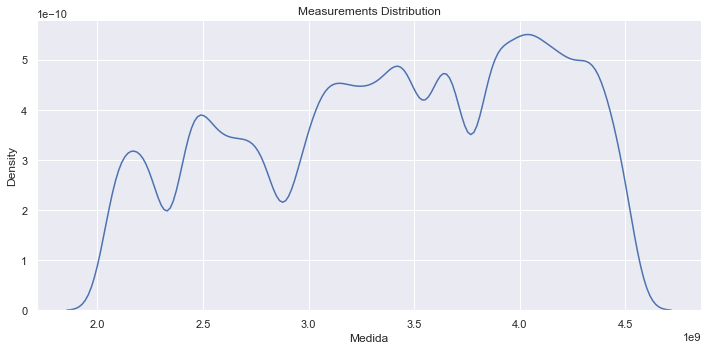

In [18]:
g = sns.displot(data = df['Medida'], kind = "kde", height = 5, aspect = 2)
g.set(title = 'Measurements Distribution');

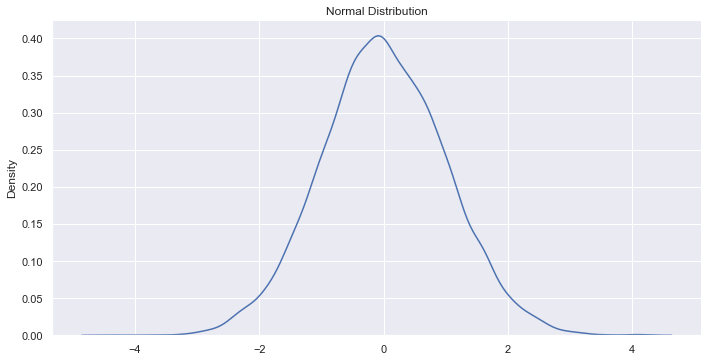

In [19]:
g = sns.displot(data = np.random.normal(size = 10000), kind = "kde", height = 5, aspect = 2)
g.set(title = 'Normal Distribution');

There are two scenarios:

* Same timestamp with different measure value
* Different timestamp (referring to the same time) with different measure value

The idea is to take the measures value, get the mean and input it to the timestamp (properly formatted). We are going to make sure the values make sense, to do this we're going to build a IQR range for the measurements distribution and take out of the mean the anomalous values

## IQR approach

In [20]:
Q1 = np.percentile(df['Medida'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['Medida'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

interval = (low_lim, up_lim)
interval

(1030510417.1640997, 5802230676.9313)

### Truncating dates

In [21]:
df['Fecha'].values[0]

datetime.datetime(2022, 1, 1, 0, 0)

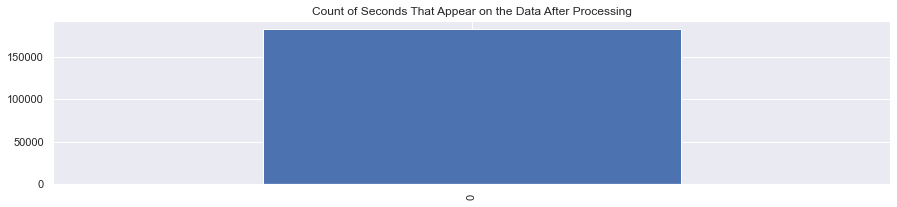

In [22]:
# Setting seconds to 0
def set_seconds(date):
    return date.replace(second = 0)

df['Fecha'] = df['Fecha'].apply(set_seconds)
df['seconds'] = df['Fecha'].apply(get_seconds)
plt.figure(figsize = (15, 3))
plt.title('Count of Seconds That Appear on the Data After Processing')
df['seconds'].value_counts().plot(kind = 'bar');

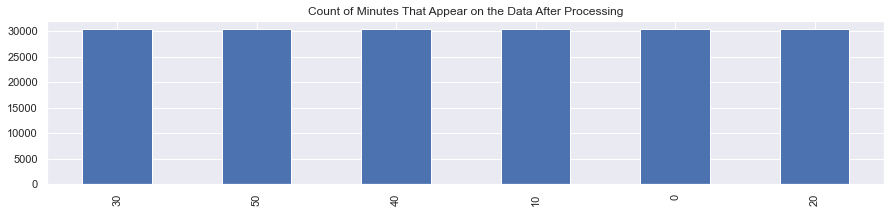

In [23]:
def round_minutes(date):
    value = pd.to_datetime(date)
    if(value.minute % 10 != 0):
        value = value.replace(minute = value.minute // 10 * 10)

    return value

df['Fecha'] = df['Fecha'].apply(round_minutes)
df['minutes'] = df['Fecha'].apply(get_minutes)
plt.figure(figsize = (15, 3))
plt.title('Count of Minutes That Appear on the Data After Processing')
df['minutes'].value_counts().plot(kind = 'bar');

### Getting mean of same time measurements

In [24]:
means = []
for name, group in df.groupby('Fecha'):
    values = group['Medida'].values
    values_inrange = []
    
    if(len(values > 1)):
        for value in values:
            if(value >= interval[0] and value <= interval[1]):
                values_inrange.append(value)
    
    else:
        values_inrange = values
    
    mean = np.mean(values_inrange)
    row = (name, mean)
    
    means.append((name, mean))

means_df = pd.DataFrame(means, columns = ['Fecha', 'Media'])

### Changing values to mean

In [25]:
df = df.drop_duplicates(subset = 'Fecha')
convert_dict = {'Fecha': str}

df = df.astype(convert_dict)
means_df = means_df.astype(convert_dict)
df = df.merge(means_df)
df = df[['Fecha', 'Media', 'Year']]
df.columns = ['Fecha', 'Medida', 'Year']

In [26]:
df

,Fecha,Medida,Year
0,2022-01-01 00:00:00,4.028715e+09,2022
1,2022-01-01 00:10:00,4.028726e+09,2022
2,2022-01-01 00:20:00,4.028738e+09,2022
3,2022-01-01 00:30:00,4.028749e+09,2022
4,2022-01-01 00:40:00,4.028760e+09,2022
...,...,...,...
182306,2019-12-31 23:10:00,2.839314e+09,2019
182307,2019-12-31 23:20:00,2.839326e+09,2019
182308,2019-12-31 23:30:00,2.839339e+09,2019
182309,2019-12-31 23:40:00,2.839351e+09,2019


# Imputing missing dates

## Counting values by Year

In [27]:
df.groupby('Year').count()

,Fecha,Medida
Year,,
2019,47168,47168
2020,48603,48603
2021,42607,42607
2022,43933,43933


## Comparing to must-be values

In [28]:
def get_year(date):
    return int(date.split(' ')[0].split('-')[0])

In [29]:
dates_2019 = list(pd.date_range(start = '2019-01-01 00:00:00',
                           end = '2019-12-31 23:50:00',
                           freq = '10min'))

dates_2020 = list(pd.date_range(start = '2020-01-01 00:00:00',
                           end = '2020-12-31 23:50:00',
                           freq = '10min'))

dates_2021 = list(pd.date_range(start = '2021-01-01 00:00:00',
                           end = '2021-12-31 23:50:00',
                           freq = '10min'))

dates_2022 = list(pd.date_range(start = '2022-01-01 00:00:00',
                           end = '2022-12-31 23:50:00',
                           freq = '10min'))

In [30]:
print('2019 must have', len(dates_2019), 'timestamps')
print('2020 must have', len(dates_2020), 'timestamps')
print('2021 must have', len(dates_2021), 'timestamps')
print('2022 must have', len(dates_2022), 'timestamps')

2019 must have 52560 timestamps
2020 must have 52704 timestamps
2021 must have 52560 timestamps
2022 must have 52560 timestamps


In [31]:
52560 + 52560 + 52560 + 52704

210384

In [32]:
mustbe_df = pd.DataFrame(
    data = {
        'Fecha' : dates_2019 + dates_2020 + dates_2021 + dates_2022
    }
)
mustbe_df = mustbe_df.astype(convert_dict)
mustbe_df

,Fecha
0,2019-01-01 00:00:00
1,2019-01-01 00:10:00
2,2019-01-01 00:20:00
3,2019-01-01 00:30:00
4,2019-01-01 00:40:00
...,...
210379,2022-12-31 23:10:00
210380,2022-12-31 23:20:00
210381,2022-12-31 23:30:00
210382,2022-12-31 23:40:00


In [33]:
result = df[['Fecha', 'Medida']].merge(mustbe_df, on = 'Fecha', how = 'right').sort_values(by = 'Fecha')
result['Year'] = result['Fecha'].apply(get_year)
result

,Fecha,Medida,Year
0,2019-01-01 00:00:00,2.042297e+09,2019
1,2019-01-01 00:10:00,2.042308e+09,2019
2,2019-01-01 00:20:00,2.042321e+09,2019
3,2019-01-01 00:30:00,2.042332e+09,2019
4,2019-01-01 00:40:00,2.042343e+09,2019
...,...,...,...
210379,2022-12-31 23:10:00,NaN,2022
210380,2022-12-31 23:20:00,NaN,2022
210381,2022-12-31 23:30:00,NaN,2022
210382,2022-12-31 23:40:00,NaN,2022


In [35]:
result.groupby('Year')['Year'].value_counts()

Year  Year
2019  2019    52560
2020  2020    52704
2021  2021    52560
2022  2022    52560
Name: Year, dtype: int64

# Saving data

In [40]:
result = result[['Fecha', 'Medida']]
result.columns = ['Date', 'Consumption']

In [41]:
result.to_csv('../Data/Processed/data.csv', index = False)